In [1]:
import os
import testfixtures
import netCDF4
from kid_readout.measurement import core, legacy
from kid_readout.measurement.io import nc, readoutnc
from kid_readout.analysis.resonator import plot_resonator

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
nc_filename = '/data/readout/2015-05-11_150346_compressor_noise_60_s.nc'
rnc = readoutnc.ReadoutNetCDF(nc_filename)

In [3]:
on_index = 0
off_index = 1
ss_channel = 0
#ss_on = legacy.sweepstream_from_rnc(rnc, sweep_group_index=on_index, timestream_group_index=on_index, channel=ss_channel)
ss_off = legacy.sweepstream_from_rnc(rnc, sweep_group_index=off_index, timestream_group_index=off_index, channel=ss_channel)

In [4]:
directory = testfixtures.TempDirectory()

In [5]:
directory.path

'/tmp/tmp10EXFP'

In [6]:
nc_filename = 'test.nc'
root_path = os.path.join(directory.path, nc_filename)
node_path = 'ss'

In [7]:
io = nc.IO(root_path)
%time core.write(ss_off, io, node_path)

CPU times: user 68 ms, sys: 20 ms, total: 88 ms
Wall time: 86.3 ms


In [8]:
io = nc.IO(root_path)
%time read = core.read(io, node_path)

CPU times: user 56 ms, sys: 8 ms, total: 64 ms
Wall time: 62.6 ms


In [9]:
read.state

{u'boffile': u'bb2xpfb14mcr17b_2015_Apr_21_1159.bof',
 u'delay_estimate': -6.3299999999999994e-05,
 u'heterodyne': 0}

In [10]:
read.sweep.state

{u'gitinfo': u'commit 5a79f1ef014c88c9f74f4096692434af02fd2855\nAuthor: Daniel Flanigan <daniel.isaiah.flanigan@gmail.com>\nDate:   Wed May 6 15:13:28 2015 -0400\n\n    select_bank fix in roach_interface plus various acquisition scripts\n',
 u'mmw_source': {u'attenuator_turns': array([ nan,  nan])},
 u'roach': {u'adc_attenuation': 31.5,
  u'dac_attenuation': 32.0,
  u'hardware_state_epoch': 1431371555.358206,
  u'hardware_state_index': 3,
  u'modulation_output': 0,
  u'modulation_rate': 1,
  u'num_tone_samples': 2097152,
  u'num_tones': 16,
  u'output_attenuation': 54.04119982655925}}

In [11]:
read.stream.state

{u'gitinfo': u'commit 5a79f1ef014c88c9f74f4096692434af02fd2855\nAuthor: Daniel Flanigan <daniel.isaiah.flanigan@gmail.com>\nDate:   Wed May 6 15:13:28 2015 -0400\n\n    select_bank fix in roach_interface plus various acquisition scripts\n',
 u'mmw_source': {u'attenuator_turns': array([ nan,  nan])},
 u'roach': {u'adc_attenuation': 31.5,
  u'dac_attenuation': 32.0,
  u'hardware_state_epoch': 1431371845.755774,
  u'hardware_state_index': 4,
  u'modulation_output': 0,
  u'modulation_rate': 1,
  u'num_tone_samples': 2097152,
  u'num_tones': 16,
  u'output_attenuation': 54.04119982655925}}

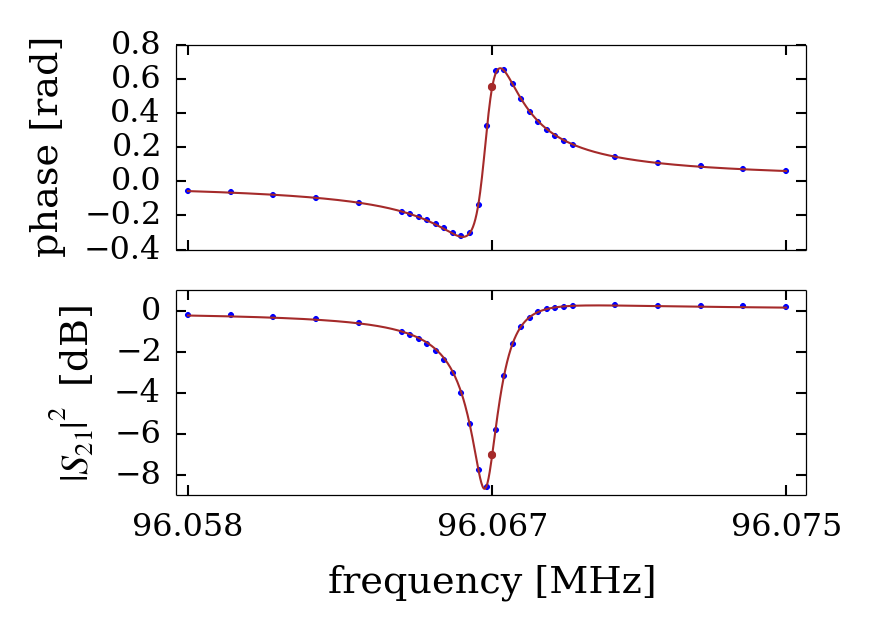

In [12]:
plot_resonator.amplitude_and_phase(read.sweep.resonator, normalize_s21=True);

In [13]:
io = nc.IO(root_path)
stream = core.read(io, 'ss:sweep:streams:0')

In [14]:
stream.s21

array([-0.01658196-0.04365296j, -0.01659773-0.04330356j,
       -0.01656477-0.04340014j, ..., -0.01668029-0.04365947j,
       -0.01656386-0.04341471j, -0.01683768-0.04365881j])

In [15]:
stream._root_path

'/tmp/tmp10EXFP/test.nc'

In [16]:
stream._node_path

'ss:sweep:streams:0'

In [17]:
directory.cleanup()